In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('movie_rating.csv')

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_id = pd.read_csv('movie_id_titles.csv')
movie_id

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [5]:
data = pd.merge(df, movie_id, on='item_id')
data

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [6]:
movierat = data.groupby('title').agg({'rating':['mean', 'count']}).droplevel(axis=1, level=0)
best_movies = movierat.sort_values(['count', 'mean'], ascending=[False, False]).rename(columns={'mean':'average rating', 
                                                                                  'count': 'number of rating'})
best_movies.head(10)

,average rating,number of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


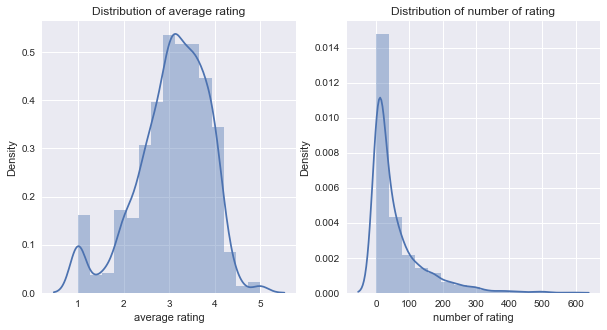

In [7]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
for i, j in list(enumerate(best_movies.columns)):
    plt.subplot(1, 2, i+1)
    sns.distplot(best_movies[j], bins=15)
    plt.title(f'Distribution of {j}')
plt.show()

## Step 1 : Membuat Pivot Table 
Pivotable memiliki indeks user dan kolom berupa kontennya. adapun value nya adalah rating yang diberikan oleh user pada film tersebut

In [8]:
moviemat = data.pivot_table(index='user_id', columns='title', values='rating').fillna(0)
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
for i in moviemat.columns:
    print(i)

'Til There Was You (1997)
1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
3 Ninjas: High Noon At Mega Mountain (1998)
39 Steps, The (1935)
8 1/2 (1963)
8 Heads in a Duffel Bag (1997)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Aiqing wansui (1994)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1

People vs. Larry Flynt, The (1996)
Perez Family, The (1995)
Perfect Candidate, A (1996)
Perfect World, A (1993)
Persuasion (1995)
Pest, The (1997)
Pete's Dragon (1977)
Phantom, The (1996)
Phantoms (1998)
Pharaoh's Army (1995)
Phat Beach (1996)
Phenomenon (1996)
Philadelphia (1993)
Philadelphia Story, The (1940)
Piano, The (1993)
Picnic (1955)
Picture Bride (1995)
Picture Perfect (1997)
Pie in the Sky (1995)
Pillow Book, The (1995)
Pink Floyd - The Wall (1982)
Pinocchio (1940)
Platoon (1986)
Playing God (1997)
Pocahontas (1995)
Poetic Justice (1993)
Poison Ivy II (1995)
Police Story 4: Project S (Chao ji ji hua) (1993)
Pollyanna (1960)
Pompatus of Love, The (1996)
Ponette (1996)
Portrait of a Lady, The (1996)
Postino, Il (1994)
Postman, The (1997)
Powder (1995)
Power 98 (1995)
Preacher's Wife, The (1996)
Prefontaine (1997)
Pretty Woman (1990)
Price Above Rubies, A (1998)
Priest (1994)
Primal Fear (1996)
Primary Colors (1998)
Princess Bride, The (1987)
Princess Caraboo (1994)
Prisoner of

## Step 2 : Calculate Correlation Between liked movie with all movies

In [10]:
film_disukai = 'Star Wars (1977)'
rating_disukai = moviemat[film_disukai]
film_serupa = pd.DataFrame(moviemat.corrwith(rating_disukai), 
                           columns=['Correlation']).sort_values('Correlation', ascending=False)
film_serupa

,Correlation
title,
Star Wars (1977),1.000000
Return of the Jedi (1983),0.746797
"Empire Strikes Back, The (1980)",0.555233
Raiders of the Lost Ark (1981),0.540455
Indiana Jones and the Last Crusade (1989),0.467523
...,...
Anna Karenina (1997),-0.116310
"Smile Like Yours, A (1997)",-0.120460
I Know What You Did Last Summer (1997),-0.132151


In [12]:
for i, j in list(enumerate(film_serupa.index[1:10])):
    print(f'{i+1}. {j}')

1. Return of the Jedi (1983)
2. Empire Strikes Back, The (1980)
3. Raiders of the Lost Ark (1981)
4. Indiana Jones and the Last Crusade (1989)
5. Toy Story (1995)
6. Terminator, The (1984)
7. Back to the Future (1985)
8. Alien (1979)
9. Princess Bride, The (1987)


In [11]:
# Step 3 : create function

def find_me_film():
    film_disukai = input('Apa film yang kamu sukai? ')
    rating_disukai = moviemat[film_disukai]
    film_serupa = pd.DataFrame(moviemat.corrwith(rating_disukai), 
                           columns=['Correlation']).sort_values('Correlation', ascending=False)
    print(f'Orang-orang yang menyukai {film_disukai}, biasanya juga menonton:')
    for i, j in list(enumerate(film_serupa.index[1:10])):
        print(f'{i+1}. {j}')

In [14]:
find_me_film()

Apa film yang kamu sukai? Star Wars (1977)
Orang-orang yang menyukai Star Wars (1977), biasanya juga menonton:
1. Return of the Jedi (1983)
2. Empire Strikes Back, The (1980)
3. Raiders of the Lost Ark (1981)
4. Indiana Jones and the Last Crusade (1989)
5. Toy Story (1995)
6. Terminator, The (1984)
7. Back to the Future (1985)
8. Alien (1979)
9. Princess Bride, The (1987)


In [15]:
find_me_film()

Apa film yang kamu sukai? Men in Black (1997)
Orang-orang yang menyukai Men in Black (1997), biasanya juga menonton:
1. Fifth Element, The (1997)
2. Return of the Jedi (1983)
3. Independence Day (ID4) (1996)
4. Lost World: Jurassic Park, The (1997)
5. Star Wars (1977)
6. Mission: Impossible (1996)
7. Star Trek: First Contact (1996)
8. Grosse Pointe Blank (1997)
9. Con Air (1997)


In [16]:
find_me_film()

Apa film yang kamu sukai? Con Air (1997)
Orang-orang yang menyukai Con Air (1997), biasanya juga menonton:
1. Face/Off (1997)
2. Rock, The (1996)
3. Lost World: Jurassic Park, The (1997)
4. Mission: Impossible (1996)
5. Fifth Element, The (1997)
6. Ransom (1996)
7. Metro (1997)
8. Austin Powers: International Man of Mystery (1997)
9. Men in Black (1997)


## Collaborative Filtering Using Anime Dataset
1. Cari Anime apa yang memiliki rata2 & jumlah rating tertinggi 
2. Buat sistem rekomendasi yang dapat memberikan rekomendasi kepada setiap user, ketika mereka menyukai suatu anime, maka sistem akan memberikan rekomendasi berdasarkan keserupaan user. Dalam artian, "orang-orang yang menyukai anime tersebut, biasanya menyukai anime apa".

In [17]:
anime = pd.read_csv('anime.csv').iloc[:850]
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
845,9471,Baka to Test to Shoukanjuu: Matsuri,"Comedy, School, Super Power",OVA,2,7.80,67684
846,150,Blood+,"Action, Drama, Horror, Military, Mystery, Supe...",TV,50,7.80,208321
847,60,Chrno Crusade,"Action, Demons, Historical, Romance, Supernatural",TV,24,7.80,140865
848,19671,Free!: FrFr - Short Movie,"Comedy, Sports",Special,7,7.80,35956


In [18]:
len(anime['name'].unique())

850

In [20]:
anime_rating = pd.read_csv('rating.csv')
anime_rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [21]:
anime_all = pd.merge(anime, anime_rating, on='anime_id')
anime_all

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
3337693,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,7.80,242553,73490,10
3337694,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,7.80,242553,73491,10
3337695,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,7.80,242553,73495,7
3337696,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,7.80,242553,73500,9


In [22]:
anime_rating = anime_all.groupby('name').agg({'rating_y':['mean', 'count']}).droplevel(0, axis=1)
best_anime = anime_rating.sort_values(['mean', 'count'], ascending=[False, False]).rename(columns={'mean':'average rating',
                                                                                                   'count':'Number of Rating'})
best_anime

,average rating,Number of Rating
name,,
Kimi no Na wa.,8.297863,2199
Ginga Eiyuu Densetsu,8.239203,903
Steins;Gate,8.126796,19283
Fullmetal Alchemist: Brotherhood,8.028933,24574
Gintama°,7.956710,1386
...,...,...
Detective Conan Movie 08: Time Travel of the Silver Sky,4.569444,216
Ansatsu Kyoushitsu (TV) 2nd Season: Kagaijugyou-hen,4.000000,25
Detective Conan: Conan vs. Kid - Shark &amp; Jewel,3.433333,60


In [23]:
best_anime.head(10)['average rating']

name
Kimi no Na wa.                        8.297863
Ginga Eiyuu Densetsu                  8.239203
Steins;Gate                           8.126796
Fullmetal Alchemist: Brotherhood      8.028933
Gintama°                              7.956710
Hunter x Hunter (2011)                7.924082
Clannad: After Story                  7.835275
Monster                               7.809099
Gintama                               7.775231
Code Geass: Hangyaku no Lelouch R2    7.765943
Name: average rating, dtype: float64

In [24]:
animemat = anime_all.pivot_table(index='user_id', columns='name', values='rating_y').fillna(0)
animemat

name,91 Days,AKB0048: Next Stage,Ajin Part 1: Shoudou,Akachan to Boku,Akagami no Shirayuki-hime,Akagami no Shirayuki-hime 2nd Season,Akame ga Kill!,Akatsuki no Yona,Akira,Angel Beats!,...,Zetsuen no Tempest,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,ef: A Tale of Melodies.,ef: A Tale of Memories.,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,8.0,3.0,...,0.0,0.0,7.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
def find_me_anime(jumlah_anime=10):
    anime_disukai = input('Apa nama anime yang kamu sukai? ')
    rating_disukai = animemat[anime_disukai]
    anime_serupa = pd.DataFrame(animemat.corrwith(rating_disukai), 
                               columns = ['correlation']).sort_values('correlation', ascending=False)
    print(f'People who watch {anime_disukai} also watch :')
    for i,j in list(enumerate(anime_serupa.index[1:jumlah_anime+1])):
        print(f'{i+1}. {j}')

In [28]:
find_me_anime(10)

Apa nama anime yang kamu sukai? Kimi no Na wa.
People who watch Kimi no Na wa. also watch :
1. Boku dake ga Inai Machi
2. Re:Zero kara Hajimeru Isekai Seikatsu
3. Shigatsu wa Kimi no Uso
4. ReLIFE
5. Kokoro ga Sakebitagatterunda.
6. Charlotte
7. Noragami Aragoto
8. One Punch Man
9. Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku
10. Shokugeki no Souma
